In [111]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPool2D, BatchNormalization

print(tf.__version__)

2.3.0


In [112]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f'The shape of x_train: {x_train.shape}\n\
The shape of x_test: {x_test.shape}\n\
The shape of y_train: {y_train.shape}\n\
The shape of y_test: {y_test.shape}')

The shape of x_train: (60000, 28, 28)
The shape of x_test: (10000, 28, 28)
The shape of y_train: (60000,)
The shape of y_test: (10000,)


In [113]:
# the data is only 2D
# convolution expect height x width x color
# color -> number of color channel
#  in this case it will be 1, because pictures are in white and black
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'The shape of x_train: {x_train.shape}\n\
The shape of x_test: {x_test.shape}')

The shape of x_train: (60000, 28, 28, 1)
The shape of x_test: (10000, 28, 28, 1)


In [114]:
# number of classes
N = len(set(y_train))
print(f'Number of classes: {N}')

Number of classes: 10


In [115]:
# # building the model using functional API
# i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3,3),  activation='relu', kernel_initializer='he_normal')(i)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(128, (3,3),  activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# x = Flatten()(x)
# x = Dropout(0.25)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(N, activation='softmax')(x)

# model = Model(i, x)

In [116]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=x_train[0].shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, 
#                  kernel_size=(3, 3), 
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Dense(N, activation='softmax'))

In [117]:
# compile and fit // using GPU

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [118]:
m = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 15
)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4624 - accuracy: 0.8346 - val_loss: 0.3245 - val_accuracy: 0.8785
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3092 - accuracy: 0.8878 - val_loss: 0.2725 - val_accuracy: 0.8974
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2613 - accuracy: 0.9037 - val_loss: 0.2476 - val_accuracy: 0.9111
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2333 - accuracy: 0.9146 - val_loss: 0.2502 - val_accuracy: 0.9102
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2124 - accuracy: 0.9213 - val_loss: 0.2466 - val_accuracy: 0.9093
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1949 - accuracy: 0.9265 - val_loss: 0.2318 - val_accuracy: 0.9193
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1818 - accuracy: 0.9315 - val_loss: 0.2225 - val_accuracy:

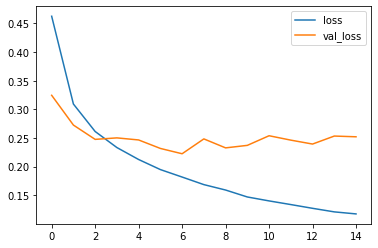

In [124]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'], label='val_loss')
plt.legend()

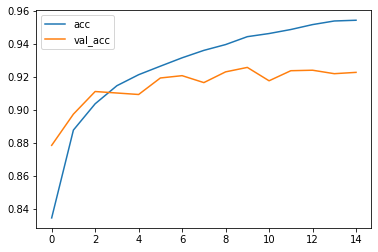

In [125]:
# Plot accuracy per iteration
plt.plot(m.history['accuracy'], label='acc')
plt.plot(m.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[874   1  10  10   0   0 102   0   3   0]
 [  1 985   0   9   1   0   3   0   1   0]
 [ 16   1 859   8  30   0  85   0   1   0]
 [ 13   1   4 941  15   0  23   0   2   1]
 [  0   1  33  34 857   0  73   0   2   0]
 [  0   0   0   0   0 984   0   5   0  11]
 [ 96   2  32  22  50   0 796   0   2   0]
 [  0   0   0   0   0   9   0 965   0  26]
 [  3   1   1   3   2   2   2   2 984   0]
 [  1   0   0   0   0   3   0  14   0 982]]


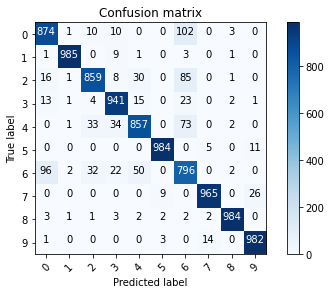

In [126]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [127]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

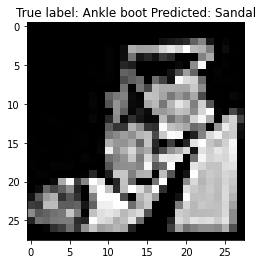

In [128]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));